# Dress Sales Analysis


Working as an analyst at an e-commerce company, and you have been given the following two data sets, which consist of details of women's apparels that have been sold out during the last year:

<b> - Dress Attribute Dataset:</b> This data set contains the different features of women's apparels.

<b> - Dress Sales Dataset:</b> This data set contains the number of sales achieved for a particular dress ID on a certain date.


Now, based on the two data sets, you are expected to perform EDA and draw meaningful insights from the data.



In [1]:
#Import the required Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Data Cleaning 

### Data Reading & Data Types 

In [2]:
#Read the data in pandas

sales_data = pd.read_csv("Dress Sales.csv")
attri_data = pd.read_csv("Attribute DataSet.csv")

In [3]:
sales_data.head()

,Dress_ID,29-08-2013,31-08-2013,09-02-2013,09-04-2013,09-06-2013,09-08-2013,09-10-2013,09-12-2013,14-09-2013,...,24-09-2013,26-09-2013,28-09-2013,30-09-2013,10-02-2013,10-04-2013,10-06-2013,10-08-2013,10-10-2013,10-12-2013
0,1.006033e+09,2114,2274,2491,2660,2727,2887,2930,3119,3204,...,3554,3624.0,3706,3746.0,3795.0,3832.0,3897,3923.0,3985.0,4048
1,1.212192e+09,151,275,570,750,813,1066,1164,1558,1756,...,2710,2942.0,3258,3354.0,3475.0,3654.0,3911,4024.0,4125.0,4277
2,1.190381e+09,6,7,7,7,8,8,9,10,10,...,11,11.0,11,11.0,11.0,11.0,11,11.0,11.0,11
3,9.660060e+08,1005,1128,1326,1455,1507,1621,1637,1723,1746,...,1878,1892.0,1914,1924.0,1929.0,1941.0,1952,1955.0,1959.0,1963
4,8.763395e+08,996,1175,1304,1396,1432,1559,1570,1638,1655,...,2032,2156.0,2252,2312.0,2387.0,2459.0,2544,2614.0,2693.0,2736


In [4]:
attri_data.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,chiffonfabric,chiffon,bow,dot,0


You have “Attribute DataSet” which contains a column named “Price”. Choose the correct statement from the following about its data type and variable type.
- Integer type and numerical variable
- Object type and categorical ordinal variable
- Object type and categorical nominal variable
- Float type and categorical variable.

<b> Correct Statment - Object type and categorical ordinal variable </b>

There is another column in “Attribute DataSet” named as “Recommendation”, choose the correct statement about its data type and variable type.
- Integer type and categorical
- Object type and categorical
- Integer type and continuous numerical
- Object type only.

<b> Correct Statment - Integer type and categorical </b>

Which of the following column do you think are of no use in “Attribute DataSet”.
- Dress_ID
- Price
- Size and material
- NeckLine
- None of the above

<b> Correct Statment - None of the above </b>

In [5]:
# Print the information about the attributes of sales_data and attri_data.

print(sales_data.info())
print(attri_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dress_ID    479 non-null    float64
 1   29-08-2013  479 non-null    int64  
 2   31-08-2013  479 non-null    int64  
 3   09-02-2013  479 non-null    int64  
 4   09-04-2013  479 non-null    int64  
 5   09-06-2013  479 non-null    int64  
 6   09-08-2013  479 non-null    int64  
 7   09-10-2013  479 non-null    int64  
 8   09-12-2013  479 non-null    object 
 9   14-09-2013  479 non-null    object 
 10  16-09-2013  479 non-null    object 
 11  18-09-2013  479 non-null    object 
 12  20-09-2013  479 non-null    object 
 13  22-09-2013  479 non-null    object 
 14  24-09-2013  479 non-null    int64  
 15  26-09-2013  257 non-null    float64
 16  28-09-2013  479 non-null    int64  
 17  30-09-2013  222 non-null    float64
 18  10-02-2013  220 non-null    float64
 19  10-04-2013  221 non-null    f

### Fixing the Rows and Columns 

As you can see, there is a column in “Attribute Dataset” named as ‘Size’. This column contains the values in abbreviation format. Write a code in Python to convert the followings:

- M into  “Medium”
- L into  “Large”
- XL into “Extra large”
- free into “Free”
- S, s & small into “Small”.

Now once you are done with changes in the dataset, what is the value of the lowest percentage, the highest percentage and the percentage of Small size categories in the column named “Size”?


In [6]:
# Column fixing, correcting size abbreviation, count the percentage of each size category in "Size" column.

attri_data.Size= attri_data.Size.replace(['S', 'small', 's'], "Small")

attri_data.Size= attri_data.Size.replace('free', "Free")

attri_data.Size= attri_data.Size.replace('M', "Medium")

attri_data.Size= attri_data.Size.replace('L', "Large") 

attri_data.Size= attri_data.Size.replace('XL', "Extra large")

In [7]:
attri_data.Size.value_counts(normalize=True)

Medium         0.356994
Free           0.344468
Large          0.194154
Small          0.075157
Extra large    0.029228
Name: Size, dtype: float64

In [8]:
# Print the value counts of each category in "Size" column.

attri_data.Size.value_counts()

Medium         171
Free           165
Large           93
Small           36
Extra large     14
Name: Size, dtype: int64

### Impute/Remove Missing values

In [9]:
# Print the null count of each variables of sales_data and attri_data.

print("Null count of each variables of attri_data:\n", attri_data.isnull().sum())
print("\nNull count of each variables of sales_data:\n", sales_data.isnull().sum())

Null count of each variables of attri_data:
 Dress_ID            0
Style               0
Price               2
Rating              0
Size                0
Season              2
NeckLine            3
SleeveLength        2
Material          119
FabricType        256
Decoration        224
Pattern Type      102
Recommendation      0
dtype: int64

Null count of each variables of sales_data:
 Dress_ID        0
29-08-2013      0
31-08-2013      0
09-02-2013      0
09-04-2013      0
09-06-2013      0
09-08-2013      0
09-10-2013      0
09-12-2013      0
14-09-2013      0
16-09-2013      0
18-09-2013      0
20-09-2013      0
22-09-2013      0
24-09-2013      0
26-09-2013    222
28-09-2013      0
30-09-2013    257
10-02-2013    259
10-04-2013    258
10-06-2013      0
10-08-2013    255
10-10-2013    255
10-12-2013      0
dtype: int64


You are given another dataset named “Dress Sales”. Now if you observe the datatypes of the columns using ‘sales_data.info()’ command, you can identify that there are certain columns defined as object data type though they primarily consist of numeric data.

Now if you try and convert these object data type columns into numeric data type(float), you will come across an error message. Try to correct this error.







In [10]:
# Print the data types information of sales_data i.e. "Dress Sales" data.

sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dress_ID    479 non-null    float64
 1   29-08-2013  479 non-null    int64  
 2   31-08-2013  479 non-null    int64  
 3   09-02-2013  479 non-null    int64  
 4   09-04-2013  479 non-null    int64  
 5   09-06-2013  479 non-null    int64  
 6   09-08-2013  479 non-null    int64  
 7   09-10-2013  479 non-null    int64  
 8   09-12-2013  479 non-null    object 
 9   14-09-2013  479 non-null    object 
 10  16-09-2013  479 non-null    object 
 11  18-09-2013  479 non-null    object 
 12  20-09-2013  479 non-null    object 
 13  22-09-2013  479 non-null    object 
 14  24-09-2013  479 non-null    int64  
 15  26-09-2013  257 non-null    float64
 16  28-09-2013  479 non-null    int64  
 17  30-09-2013  222 non-null    float64
 18  10-02-2013  220 non-null    float64
 19  10-04-2013  221 non-null    f

In [11]:
# Try to convert the object type into float type of data. YOU GET ERROR MESSAGE.

sales_data['09-12-2013'] = pd.to_numeric(sales_data['09-12-2013'], downcast='float')

ValueError: Unable to parse string "Removed" at position 263

In [12]:
# Do the required changes in the "Dress Sales" data set to get null values on string values.

sales_data.loc[sales_data['09-12-2013']== 'Removed',"09-12-2013"] = np.NaN

sales_data.loc[sales_data['14-09-2013']== 'removed',"14-09-2013"] = np.NaN

sales_data.loc[sales_data['16-09-2013']== 'removed',"16-09-2013"] = np.NaN

sales_data.loc[sales_data['18-09-2013']== 'removed',"18-09-2013"] = np.NaN

sales_data.loc[sales_data['20-09-2013']== 'removed',"20-09-2013"] = np.NaN

sales_data.loc[sales_data['22-09-2013']== 'Orders',"22-09-2013"] = np.NaN

In [13]:
# Convert the object type columns in "Dress Sales" into float type of data type.

sales_data['09-12-2013'] = pd.to_numeric(sales_data['09-12-2013'], downcast='float')
sales_data['14-09-2013'] = pd.to_numeric(sales_data['14-09-2013'], downcast='float')
sales_data['16-09-2013'] = pd.to_numeric(sales_data['16-09-2013'], downcast='float')
sales_data['18-09-2013'] = pd.to_numeric(sales_data['18-09-2013'], downcast='float')
sales_data['20-09-2013'] = pd.to_numeric(sales_data['20-09-2013'], downcast='float')
sales_data['22-09-2013'] = pd.to_numeric(sales_data['22-09-2013'], downcast='float')

In [14]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dress_ID    479 non-null    float64
 1   29-08-2013  479 non-null    int64  
 2   31-08-2013  479 non-null    int64  
 3   09-02-2013  479 non-null    int64  
 4   09-04-2013  479 non-null    int64  
 5   09-06-2013  479 non-null    int64  
 6   09-08-2013  479 non-null    int64  
 7   09-10-2013  479 non-null    int64  
 8   09-12-2013  478 non-null    float32
 9   14-09-2013  478 non-null    float32
 10  16-09-2013  478 non-null    float32
 11  18-09-2013  478 non-null    float32
 12  20-09-2013  478 non-null    float32
 13  22-09-2013  478 non-null    float32
 14  24-09-2013  479 non-null    int64  
 15  26-09-2013  257 non-null    float64
 16  28-09-2013  479 non-null    int64  
 17  30-09-2013  222 non-null    float64
 18  10-02-2013  220 non-null    float64
 19  10-04-2013  221 non-null    f

When you see the null counts in “Dress Sales” dataset after performing all the operations that have been mentioned in jupyter notebook, you will find that there are some columns in “Dress Sales” data where there are more than 40% of missing values. Based on your understanding of dealing with missing values do the following steps.

In [15]:
# Print the null percetange of each column of sales_data.

round((sales_data.isnull().sum()/len(sales_data.index)*100),2)

Dress_ID       0.00
29-08-2013     0.00
31-08-2013     0.00
09-02-2013     0.00
09-04-2013     0.00
09-06-2013     0.00
09-08-2013     0.00
09-10-2013     0.00
09-12-2013     0.21
14-09-2013     0.21
16-09-2013     0.21
18-09-2013     0.21
20-09-2013     0.21
22-09-2013     0.21
24-09-2013     0.00
26-09-2013    46.35
28-09-2013     0.00
30-09-2013    53.65
10-02-2013    54.07
10-04-2013    53.86
10-06-2013     0.00
10-08-2013    53.24
10-10-2013    53.24
10-12-2013     0.00
dtype: float64

In [16]:
# Drop the columns in "Dress Sales" which have more than 40% of missing values.

sales_data.drop(["26-09-2013","30-09-2013","10-02-2013","10-04-2013","10-08-2013","10-10-2013"], axis=1, inplace=True) 

In [17]:
# Print the null percetange of each column of sales_data.

round((sales_data.isnull().sum()/len(sales_data.index)*100),2)

Dress_ID      0.00
29-08-2013    0.00
31-08-2013    0.00
09-02-2013    0.00
09-04-2013    0.00
09-06-2013    0.00
09-08-2013    0.00
09-10-2013    0.00
09-12-2013    0.21
14-09-2013    0.21
16-09-2013    0.21
18-09-2013    0.21
20-09-2013    0.21
22-09-2013    0.21
24-09-2013    0.00
28-09-2013    0.00
10-06-2013    0.00
10-12-2013    0.00
dtype: float64

You should categorise the dates into seasons in “Dress Sales” data to simplify the analysis according to the following criteria:
- June, July and August: Summer.
- September, October and November: Autumn.
- December, January and February: WInter.
- March, April and May: Spring.




In [18]:
# Create the four seasons columns in sales_data, according to the above criteria.

sales_data['Spring'] = sales_data.apply(lambda x: x['09-04-2013'], axis=1)

sales_data['Summer'] = sales_data.apply(lambda x: x['29-08-2013'] + x['31-08-2013']+ x['09-06-2013']+ x['09-08-2013']+
                                        x['10-06-2013'], axis=1)

sales_data['Winter'] = sales_data.apply(lambda x: x['09-02-2013'] + x['09-12-2013']+ x['10-12-2013'], axis=1)

sales_data['Autumn'] = sales_data.apply(lambda x: x['09-10-2013'] + x['14-09-2013']+ x['16-09-2013']+ x['18-09-2013']+ 
                                        x['20-09-2013']+ x['22-09-2013']+ x['24-09-2013']+ x['28-09-2013'], axis=1)

In [19]:
# calculate the sum of sales in each seasons in sales_data i.e. "Dress Sales".

sales_data[['Summer','Autumn','Winter','Spring']].sum()

Summer     691907.0
Autumn    1353543.0
Winter     473640.0
Spring     143600.0
dtype: float64

Now let's merge attri_data with sales_data with left join manner, so that the information of attri_data should remain intact.

In [20]:
# Merge attri_data with sales_data into attri_data. this is also called left merge.

attri_data = pd.merge(left=attri_data,right=sales_data, how='left', left_on='Dress_ID', right_on='Dress_ID')
attri_data.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,...,20-09-2013,22-09-2013,24-09-2013,28-09-2013,10-06-2013,10-12-2013,Spring,Summer,Winter,Autumn
0,1006032852,Sexy,Low,4.6,Medium,Summer,o-neck,sleevless,NaN,chiffon,...,3386.0,3479.0,3554,3706,3897,4048,2660.0,13899.0,9658.0,26857.0
1,1212192089,Casual,Low,0.0,Large,Summer,o-neck,Petal,microfiber,NaN,...,2106.0,2454.0,2710,3258,3911,4277,750.0,6216.0,6405.0,17311.0
2,1190380701,vintage,High,0.0,Large,Automn,o-neck,full,polyster,NaN,...,10.0,11.0,11,11,11,11,7.0,40.0,28.0,82.0
3,966005983,Brief,Average,4.6,Large,Spring,o-neck,full,silk,chiffon,...,1812.0,1845.0,1878,1914,1952,1963,1455.0,7213.0,5012.0,14411.0
4,876339541,cute,Low,4.5,Medium,Summer,o-neck,butterfly,chiffonfabric,chiffon,...,1824.0,1919.0,2032,2252,2544,2736,1396.0,7706.0,5678.0,14676.0


In [21]:
# Now Drop the Date columns from attri_data as it is already combined into four seasons.

attri_data.drop(attri_data.loc[:,'29-08-2013':'10-12-2013'].columns, axis= 1, inplace= True)

Print the null count of attri_data to get the idea about the missing values in data set.

In [22]:
# Print the null count of each columns in attri_data dataframe

attri_data.isnull().sum()

Dress_ID            0
Style               0
Price               2
Rating              0
Size                0
Season              2
NeckLine            3
SleeveLength        2
Material          119
FabricType        256
Decoration        224
Pattern Type      102
Recommendation      0
Spring              0
Summer              0
Winter              1
Autumn              2
dtype: int64

You can see that there are two types of variables one with a large number of missing values and another is very less number of missing values. These two columns can be categorized as:

Type-1: Missing values are very less (around 2 or 3 missing values): Price, Season, NeckLine, SleeveLength, Winter and Autumn. 

Type-2: Missing values are large in numbers (more than 15%): Material, FabricType, Decoration and Pattern Type.



In [23]:
# Deal with the missing values of Type-1 columns: Price, Season, NeckLine, SleeveLength, Winter and Autumn.
# Fill the missing values with MODE value

attri_data['Price'].fillna(attri_data['Price'].mode(), inplace=True)
attri_data['Season'].fillna(attri_data['Season'].mode(), inplace=True)
attri_data['NeckLine'].fillna(attri_data['NeckLine'].mode(), inplace=True)
attri_data['SleeveLength'].fillna(attri_data['SleeveLength'].mode(), inplace=True)
attri_data['Winter'].fillna(attri_data['Winter'].mode(), inplace=True)
attri_data['Autumn'].fillna(attri_data['Autumn'].mode(), inplace=True)

In [24]:
# Deal with the missing values for Type-2 columns: Material, FabricType, Decoration and Pattern Type.
# There are 2-ways to deal with missing values

# 1. Drop the missing values for Type-2 columns
attri_data.dropna(axis=0, subset=['Material','FabricType','Decoration','Pattern Type'], inplace=True)

# 2. Replace the missing(NA) values with Missing
#attri_data.Material= attri_data.Material.replace(np.nan, "Missing")
#attri_data.FabricType= attri_data.FabricType.replace(np.nan, "Missing")
#attri_data.Decoration= attri_data.Decoration.replace(np.nan, "Missing")
#attri_data['Pattern Type']= attri_data['Pattern Type'].replace(np.nan, "Missing")

In [25]:
attri_data.isnull().sum()

Dress_ID          0
Style             0
Price             0
Rating            0
Size              0
Season            0
NeckLine          0
SleeveLength      0
Material          0
FabricType        0
Decoration        0
Pattern Type      0
Recommendation    0
Spring            0
Summer            0
Winter            0
Autumn            1
dtype: int64

### Standardise value 

In the given dataset, there are certain discrepancies with the categorical names such as irregular spellings. Choose the correct option of columns with irregular categories and update them.
 
- Season, NeckLine
- Price, Material
- fabricType, Decoration
- Season, SleeveLength

<b> Correct option: Season, SleeveLength </b>

In [27]:
print("Discrepancies check such as irregular spellings in categorical columns:")
print("\nIn SEASON column:\n",attri_data['Season'].unique())
print("\nIn NECHLINE column:\n",attri_data['NeckLine'].unique())
print("\nIn PRICE column:\n",attri_data['Price'].unique())
print("\nIn MATERIAL column:\n",attri_data['Material'].unique())
print("\nIn FABRICTYPE column:\n",attri_data['FabricType'].unique())
print("\nIn DECORATION column:\n",attri_data['Decoration'].unique())
print("\nIn SLEEVELENGTH column:\n",attri_data['SleeveLength'].unique())

Discrepancies check such as irregular spellings in categorical columns:

In SEASON column:
 ['Spring' 'Summer' 'Automn' 'Winter' 'winter' 'Autumn']

In NECHLINE column:
 ['o-neck' 'v-neck' 'ruffled' 'boat-neck' 'open' 'peterpan-collor'
 'slash-neck' 'Sweetheart' 'bowneck' 'turndowncollor']

In PRICE column:
 ['Average' 'Low' 'Medium' 'High']

In MATERIAL column:
 ['silk' 'chiffonfabric' 'cotton' 'polyster' 'linen' 'rayon' 'lycra' 'mix'
 'spandex' 'other' 'nylon' 'model' 'shiffon']

In FABRICTYPE column:
 ['chiffon' 'broadcloth' 'satin' 'worsted' 'jersey' 'woolen' 'poplin'
 'tulle' 'sattin' 'wollen' 'shiffon' 'terry' 'Corduroy']

In DECORATION column:
 ['embroidary' 'bow' 'beading' 'lace' 'sashes' 'ruffles' 'applique'
 'hollowout' 'sequined' 'feathers' 'ruched' 'tassel' 'pockets' 'plain'
 'draped' 'cascading' 'none']

In SLEEVELENGTH column:
 ['full' 'butterfly' 'short' 'sleevless' 'halfsleeve' 'threequarter'
 'thressqatar']


In [28]:
#correcting the spellings.

attri_data.Season.replace(['Automn','winter'],["Autumn", "Winter"], inplace=True)
attri_data['Season'].unique()

array(['Spring', 'Summer', 'Autumn', 'Winter'], dtype=object)

In [29]:
#correcting the spellings.

attri_data.SleeveLength= attri_data.SleeveLength.replace(['threequarter', 'thressqatar'], "three quater")
attri_data['SleeveLength'].unique()

array(['full', 'butterfly', 'short', 'sleevless', 'halfsleeve',
       'three quater'], dtype=object)

## Univariate Analysis 

### Categorical Unordered Univariate Analysis
 

There is a column named ‘Style’ in ‘Attribute Dataset’ which consists of the different style categories of the women apparels. Certain categories whose total sale is less than 50000 across all the seasons is considered under one single category as ‘Others’.


Which of the following categories in ‘Style’ column can be grouped into ‘Others’ category? and perform the grouping operation in the notebook for further analysis.

<b>- Flare, Novelty, bohemian, party, sexy, vintage, work</b>


In [30]:
# Convert the Style categories:

total_collection=attri_data.groupby(['Style'])['Spring','Winter','Autumn', 'Summer'].sum()

In [31]:
total_collection.sum(axis = 1)

Style
Brief        81921.0
Casual      262584.0
Flare          321.0
Novelty       1536.0
Sexy         55631.0
bohemian     18463.0
cute        254966.0
party        27303.0
sexy         19874.0
vintage       9769.0
work         21837.0
dtype: float64

In [32]:
# Find the categories that have sales values less than 50,000 across all the seasons.

total_collection[total_collection.sum(axis= 1)<50000]

,Spring,Winter,Autumn,Summer
Style,,,,
Flare,12.0,60.0,181.0,68.0
Novelty,76.0,244.0,908.0,308.0
bohemian,1097.0,2839.0,10665.0,3862.0
party,1346.0,5092.0,13594.0,7271.0
sexy,1283.0,5587.0,5879.0,7125.0
vintage,231.0,1960.0,5656.0,1922.0
work,1222.0,3927.0,10671.0,6017.0


In [33]:
# Group "Style" categories into "Others" which have less than 50000 sales across all the seasons.

attri_data.replace(total_collection[total_collection.sum(axis=1)<50000].index, 'Others', inplace=True)

What is the percentage of “cute” and “Others” category in “Style” column in “Attribute DataSet” respectively?
<br><b> - Cute: 19.80% </b></br>
<b> - Others: 17.82% </b>


Casual    0.475248
cute      0.198020
Others    0.178218
Sexy      0.108911
Brief     0.039604
Name: Style, dtype: float64


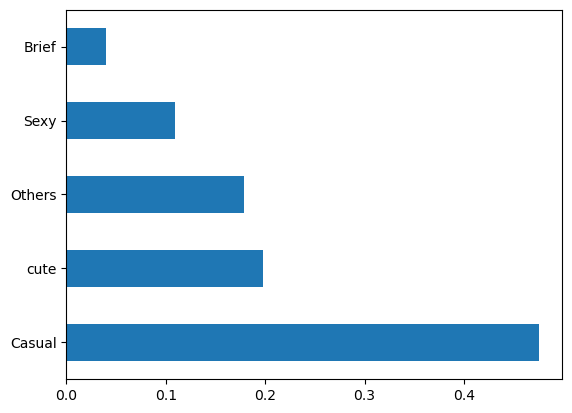

In [34]:
# Calculate the percentage of each categories in the "Style" variable.

print(attri_data.Style.value_counts(normalize=True))
attri_data.Style.value_counts(normalize=True).plot.barh()
plt.show()

Similarly Club Neckline, SLeeve length categories into "Others" which have less than 50000 sales across all the seasons.

In [35]:
# Group "Neckline" categories into "Others" which have less than 50000 sales across all the seasons.

neckline_collection=attri_data.groupby(['NeckLine'])['Spring','Winter','Autumn', 'Summer'].sum()
neckline_collection[neckline_collection.sum(axis= 1)<50000]

,Spring,Winter,Autumn,Summer
NeckLine,,,,
Sweetheart,206.0,544.0,2030.0,719.0
boat-neck,293.0,633.0,2477.0,919.0
bowneck,144.0,441.0,1423.0,552.0
open,36.0,129.0,364.0,176.0
peterpan-collor,847.0,2284.0,6253.0,4036.0
slash-neck,599.0,1814.0,5297.0,2800.0
turndowncollor,183.0,416.0,1657.0,598.0


In [36]:
attri_data.replace(neckline_collection[neckline_collection.sum(axis=1)<50000].index, 'Others', inplace= True)
attri_data.NeckLine.unique()

array(['o-neck', 'v-neck', 'ruffled', 'Others'], dtype=object)

In [37]:
# Group "Sleeve length" categories into "Others" which have less than 50000 sales across all the seasons.

slength_collection=attri_data.groupby(['SleeveLength'])['Spring','Winter','Autumn', 'Summer'].sum()
slength_collection[slength_collection.sum(axis= 1)<50000]

,Spring,Winter,Autumn,Summer
SleeveLength,,,,
butterfly,1396.0,5678.0,14676.0,7706.0
three quater,827.0,1919.0,7117.0,2744.0


In [38]:
attri_data.replace(slength_collection[slength_collection.sum(axis=1)<50000].index, 'Others', inplace= True)
attri_data.SleeveLength.unique()

array(['full', 'Others', 'short', 'sleevless', 'halfsleeve'], dtype=object)

Club material, fabrictype, patterntype and decoration categories into "Others" which have less than 25000 sales across all the seasons

In [39]:
# Group "material" categories into "Others" which have less than 25000 sales across all the seasons.

material_collection=attri_data.groupby(['Material'])['Spring','Winter','Autumn', 'Summer'].sum()
material_collection[material_collection.sum(axis= 1)<50000]

,Spring,Winter,Autumn,Summer
Material,,,,
linen,931.0,3159.0,8284.0,4724.0
lycra,558.0,2383.0,6359.0,3217.0
mix,2274.0,8898.0,24073.0,12472.0
model,8.0,43.0,144.0,50.0
nylon,19.0,76.0,248.0,86.0
other,282.0,617.0,2419.0,889.0
shiffon,490.0,1353.0,4575.0,1877.0
spandex,1035.0,3247.0,9136.0,5045.0


In [40]:
attri_data.replace(material_collection[material_collection.sum(axis=1)<50000].index, 'Others', inplace= True)
attri_data.Material.unique()

array(['silk', 'chiffonfabric', 'cotton', 'polyster', 'Others', 'rayon'],
      dtype=object)

In [41]:
# Group "fabric type" categories into "Others" which have less than 25000 sales across all the seasons.

fabric_collection=attri_data.groupby(['FabricType'])['Spring','Winter','Autumn', 'Summer'].sum()
fabric_collection[fabric_collection.sum(axis= 1)<50000]

,Spring,Winter,Autumn,Summer
FabricType,,,,
Corduroy,538.0,1258.0,4828.0,1763.0
Others,504.0,1443.0,4852.0,1972.0
jersey,1839.0,6309.0,17579.0,9368.0
poplin,36.0,129.0,364.0,176.0
satin,341.0,2807.0,5879.0,2376.0
sattin,67.0,300.0,1101.0,358.0
terry,25.0,60.0,208.0,80.0
tulle,135.0,310.0,1223.0,434.0
wollen,184.0,416.0,1658.0,600.0


In [42]:
attri_data.replace(fabric_collection[fabric_collection.sum(axis=1)<50000].index, 'Others', inplace= True)
attri_data.FabricType.unique()

array(['chiffon', 'broadcloth', 'Others'], dtype=object)

In [43]:
# Group "patern type" categories into "Others" which have less than 25000 sales across all the seasons.

pattern_collection=attri_data.groupby(['Pattern Type'])['Spring','Winter','Autumn', 'Summer'].sum()
pattern_collection[pattern_collection.sum(axis= 1)<50000]

,Spring,Winter,Autumn,Summer
Pattern Type,,,,
animal,1108.0,3707.0,9916.0,5539.0
geometric,285.0,1017.0,2871.0,1459.0
patchwork,1964.0,5996.0,17963.0,9103.0
striped,887.0,2627.0,8226.0,3808.0


In [44]:
attri_data.replace(pattern_collection[pattern_collection.sum(axis=1)<50000].index, 'Others', inplace= True)
attri_data['Pattern Type'].unique()

array(['print', 'dot', 'solid', 'Others'], dtype=object)

In [45]:
# Group "decoration" categories into "Others" which have less than 25000 sales across all the seasons.

dec_collection=attri_data.groupby(['Decoration'])['Spring','Winter','Autumn', 'Summer'].sum()
dec_collection[dec_collection.sum(axis= 1)<50000]

,Spring,Winter,Autumn,Summer
Decoration,,,,
beading,2364.0,8372.0,15573.0,12251.0
cascading,8.0,34.0,126.0,42.0
draped,399.0,691.0,2587.0,1067.0
embroidary,1503.0,6556.0,18410.0,8537.0
feathers,1.0,8.0,19.0,8.0
hollowout,1962.0,7265.0,21060.0,9961.0
none,217.0,538.0,2059.0,737.0
plain,8.0,43.0,144.0,50.0
pockets,178.0,746.0,2280.0,842.0


In [46]:
attri_data.replace(dec_collection[dec_collection.sum(axis=1)<50000].index, 'Others', inplace= True)
attri_data.Decoration.unique()

array(['Others', 'bow', 'lace', 'sashes', 'ruffles', 'applique'],
      dtype=object)

### Caregorical Ordered Univariate Analysis

Which of the following is an unordered variable in “Attribute DataSet”.
- Style
- Price
- Season
- Size

<b>Correct Option: Style because the Style category contains the type of styles available, and it is an unordered type.</b>

### Numerical variable Univariate analysis:

What is the approximate difference between the maximum value and 75th percentile in “Autumn” column.
- Approx 54000
- Approx 55000
- Approx 52000
- Approx 50000

<b>Correct Option: Approx 52000</b>

In [47]:
# Describe the numerical variale: "Autumn".

attri_data.Autumn.describe()

count      100.000000
mean      3728.040000
std       6823.095931
min          1.000000
25%        493.500000
50%       1561.500000
75%       3907.000000
max      55532.000000
Name: Autumn, dtype: float64

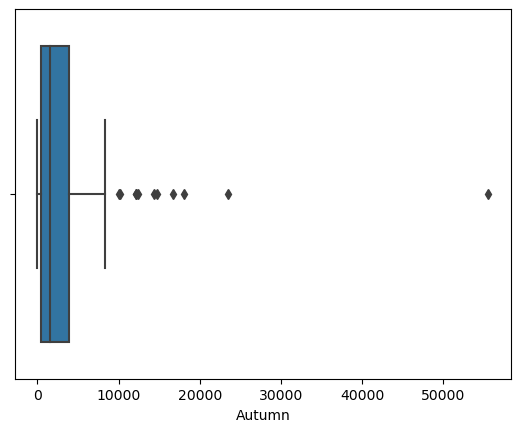

In [48]:
# plot the boxplot of "Autumn" column.

sns.boxplot(attri_data.Autumn)
plt.show()

In [49]:
x = attri_data['Autumn'].max() - attri_data['Autumn'].quantile(0.75)
x

51625.0

Which of the following season has the highest difference between the maximum value and 99th quantile of sales?
- Winter
- Summer
- Spring
- Autumn

<b> Correct Option - Autumn </b>

In [50]:
# Find the maximum and 99th percentile of Winter season.

attri_data.Winter.quantile([0.99, 1])

0.99     8697.0
1.00    20388.0
Name: Winter, dtype: float64

In [51]:
# Find the maximum and 99th percentile of Summer season.

attri_data.Summer.quantile([0.99, 1])

0.99    14149.0
1.00    35577.0
Name: Summer, dtype: float64

In [52]:
# Find the maximum and 99th percentile of Spring season.

attri_data.Spring.quantile([0.99, 1])

0.99    2844.0
1.00    7374.0
Name: Spring, dtype: float64

In [53]:
# Find the maximum and 99th percentile of Autumn season.

attri_data.Autumn.quantile([0.99, 1])

0.99    23803.49
1.00    55532.00
Name: Autumn, dtype: float64

## Bivariate Analysis 

### Numerical- Categorical analysis

Which of the following “Price” category has the lowest average value of rating?
- very-high
- Medium
- Low
- High

<b> Correct option - High </b>

In [54]:
# Find the Mean of Ratings for each Price category.

print(attri_data.groupby('Price')['Rating'].mean())

Price
Average    3.100000
High       2.150000
Low        3.990698
Medium     3.328571
Name: Rating, dtype: float64


In [55]:
# Find the median of Ratings for each Style category.

print(attri_data.groupby('Style')['Rating'].median())

Style
Brief     4.5
Casual    4.6
Others    4.6
Sexy      4.4
cute      4.5
Name: Rating, dtype: float64


Which of the following season has the highest average value of sale for “Recommendation” value equals to 1.
- Summer
- Spring
- Autumn
- Winter

<b> Correct Option: Autumn</b>

Recommendation
0    1963.916667
1    2105.048780
Name: Summer, dtype: float64


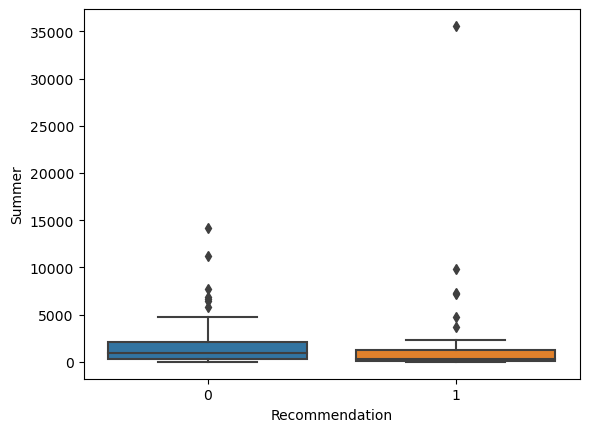

In [56]:
# Summer sale vs Recommendation.

print(attri_data.groupby('Recommendation')['Summer'].mean())

sns.boxplot(data=attri_data, x="Recommendation",y="Summer")

plt.show()

Recommendation
0    402.833333
1    427.146341
Name: Spring, dtype: float64


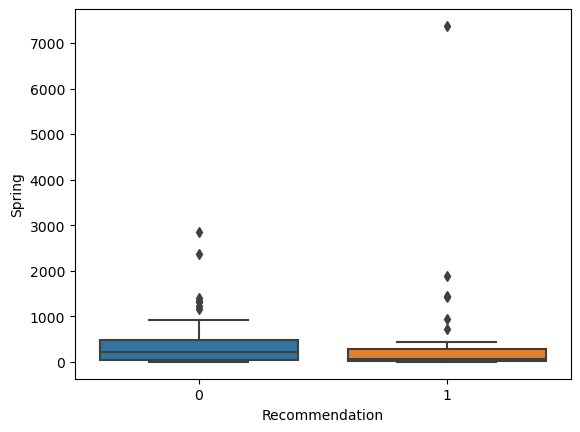

In [57]:
# Spring sale vs Recommendation.

print(attri_data.groupby('Recommendation')['Spring'].mean())

sns.boxplot(data=attri_data, x="Recommendation",y="Spring")

plt.show()

Recommendation
0    3775.966667
1    3656.150000
Name: Autumn, dtype: float64


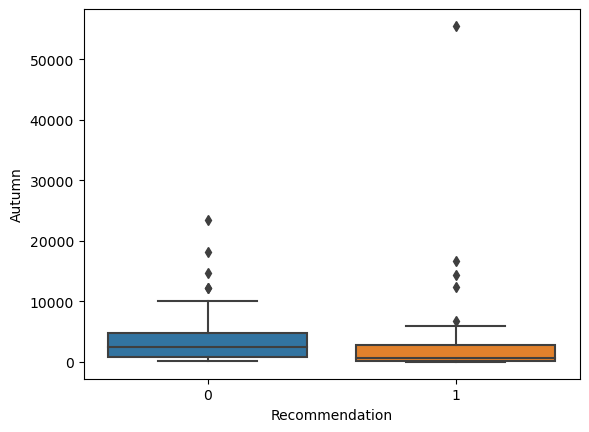

In [58]:
# Autumn sale vs Recommendation.

print(attri_data.groupby('Recommendation')['Autumn'].mean())

sns.boxplot(data=attri_data, x="Recommendation",y="Autumn")

plt.show()

Recommendation
0    1330.350000
1    1359.878049
Name: Winter, dtype: float64


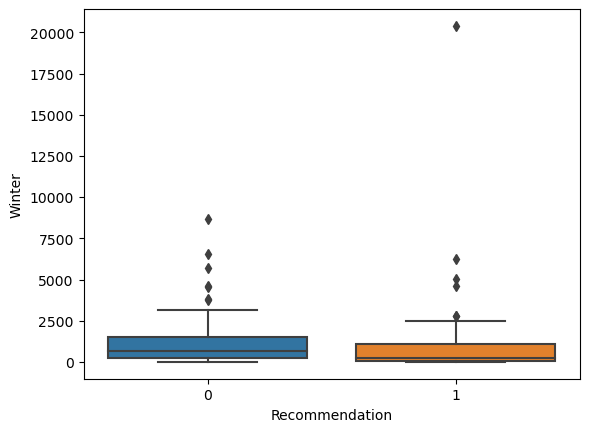

In [59]:
# Winter sale vs Recommendation.

print(attri_data.groupby('Recommendation')['Winter'].mean())

sns.boxplot(data=attri_data, x="Recommendation",y="Winter")

plt.show()

### Categorical categorical bivariate analysis


Which of the following size categories has the highest positive recommendations?
- Medium and extra large
- Extra large and small
- Free and small
- Free and medium

<b>Ans: Free and medium</b>

Size
Extra large     2
Free           17
Large           9
Medium         13
Small           0
Name: Recommendation, dtype: int64

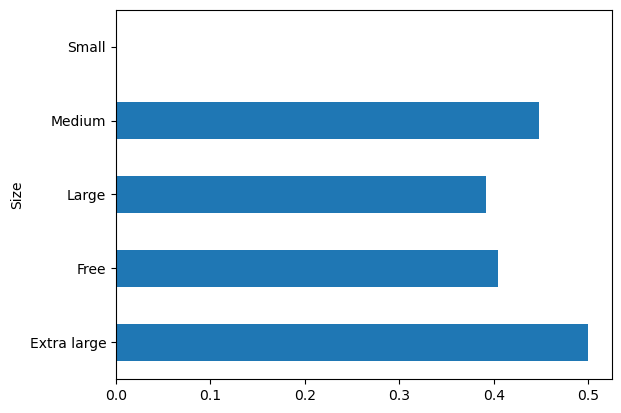

In [60]:
# Size vs Recommendation.

attri_data.groupby(['Size'])['Recommendation'].mean().plot.barh()
attri_data.groupby('Size')['Recommendation'].sum()

### Multivariate analysis 

Which of the following pair of “Style” and “Price” category has the highest average of positive recommendations?
- Price: medium and style: vintage
- Price: medium and style: cute
- Price: very high and style: party
- Price: low and style: sexy

<b>Ans:- Price: Medium and Style: Cute</b>

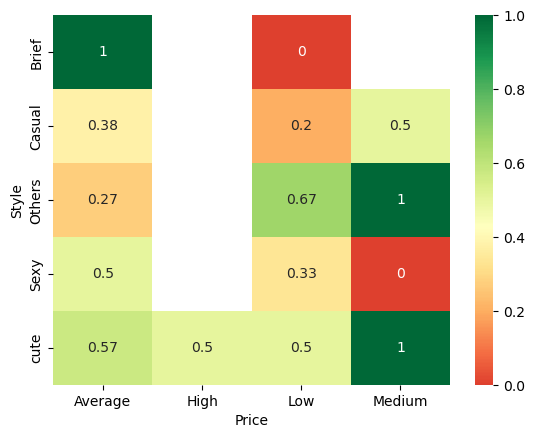

In [61]:
# plot the heat map of Style, price and Recommendation.

res = pd.pivot_table(data=attri_data, index="Style", columns="Price", values="Recommendation")

sns.heatmap(res, cmap="RdYlGn", annot=True, center=0.427)

plt.show()

Which of the material type has no recommendation in summer and winter seasons?

<b>Ans: Rayon</b>

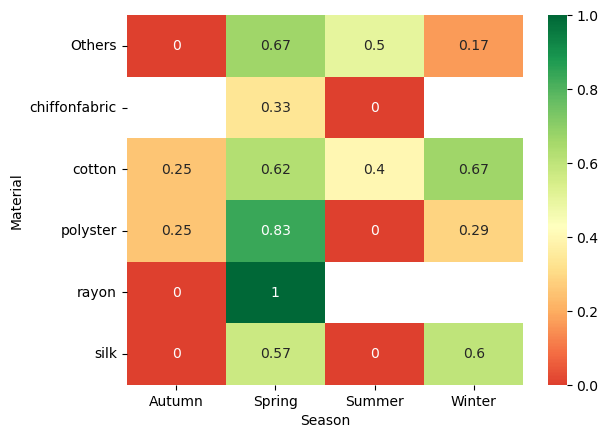

In [62]:
# plot the heat map of Season, material and Recommendation.

res = pd.pivot_table(data=attri_data, index="Material", columns="Season", values="Recommendation")

sns.heatmap(res, cmap="RdYlGn", annot=True, center=0.427)

plt.show()